# Preparing the dataset

In [1]:
import pandas as pd 
import logging
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
# logging the time taken to do certain steps
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# grabbing the dataset
df = pd.read_csv("news_dataset.csv", index_col=0)
# taking a look at the state of the dataset
df

,title,content,publication,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake
...,...,...,...,...
15707,An eavesdropping Uber driver saved his 16-year...,Uber driver Keith Avila picked up a p...,Washington Post,real
15708,Plane carrying six people returning from a Cav...,Crews on Friday continued to search L...,Washington Post,real
15709,After helping a fraction of homeowners expecte...,When the Obama administration announced a...,Washington Post,real
15710,"Yes, this is real: Michigan just banned bannin...",This story has been updated. A new law in...,Washington Post,real


In [2]:
print("Fake total={}, Real total={}".format(len(df[df['label'].str.contains('fake')]),
                                            len(df[df['label'].str.contains('real')])))

Fake total=12999, Real total=15712


### There is a total of 28711 rows however, the index resets when going from 'fake' to 'real' articles:

In [3]:
print(df['content'])

0        Print They should pay all the back all the mon...
1        Why Did Attorney General Loretta Lynch Plead T...
2        Red State : \nFox News Sunday reported this mo...
3        Email Kayla Mueller was a prisoner and torture...
4        Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...
                               ...                        
15707             Uber driver Keith Avila picked up a p...
15708             Crews on Friday continued to search L...
15709         When the Obama administration announced a...
15710         This story has been updated. A new law in...
15711         The nation’s first recreational marijuana...
Name: content, Length: 28711, dtype: object


##### - Removing rows with missing data as they will not serve any purpose in a text classification problem.
##### - Resetting the index of the dataset to solve the index problem. 
##### - Checking the number of articles remaining for each label to ensure that there isn't a big difference

In [4]:
#drop NaN values
df = df.dropna()
#reset index column after removing NaN values
df.reset_index(drop=True, inplace= True)
df

,title,content,publication,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake
...,...,...,...,...
27980,An eavesdropping Uber driver saved his 16-year...,Uber driver Keith Avila picked up a p...,Washington Post,real
27981,Plane carrying six people returning from a Cav...,Crews on Friday continued to search L...,Washington Post,real
27982,After helping a fraction of homeowners expecte...,When the Obama administration announced a...,Washington Post,real
27983,"Yes, this is real: Michigan just banned bannin...",This story has been updated. A new law in...,Washington Post,real


In [5]:
print("Fake total={}, Real total={}".format(len(df[df['label'].str.contains('fake')]),
                                            len(df[df['label'].str.contains('real')])))

Fake total=12273, Real total=15712


#### - Elementary visualization of the dataset to see if any differences emerge when comparing 'fake' and 'real labels 

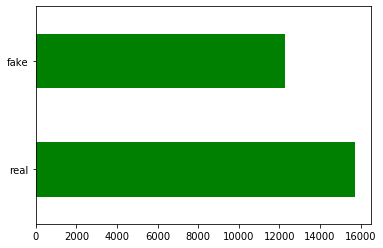

In [6]:
# visualizing the difference in number of articles 
fig = df['label'].value_counts().plot(kind='barh', color="green")
fig.figure.savefig("barh.png")

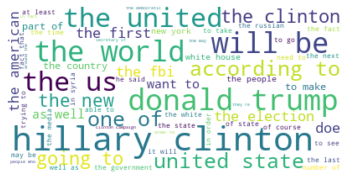

Top 60 Words in the articles labelled as 'Fake'


In [7]:
stopwords = set(STOPWORDS)
# adding terms that obfuscated the wordcloud 
stopwords.add("wa")
stopwords.add("hi")
stopwords.add("ha")
#all the articles up to 12273
text = " ".join(content for content in df['content'][:12273])
text = text.lower()
wordcloud = WordCloud(stopwords = stopwords,max_words=60, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print("Top 60 Words in the articles labelled as 'Fake'")
wordcloud.to_file("wordClouds/first_fake.png")

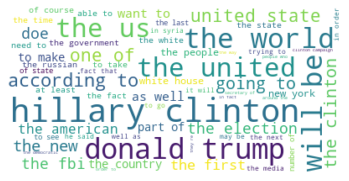

Top 60 Words in the articles labelled as 'Real'


In [8]:
text_real = " ".join(content for content in df['content'][12274:])
text_real = text.lower()
wordcloud = WordCloud(stopwords = stopwords,max_words=60, background_color="white").generate(text_real)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print("Top 60 Words in the articles labelled as 'Real'")
wordcloud.to_file("wordClouds/first_real.png")

In [9]:
# taking a peak at an individual article.
df['content'][2]

'Red State : \nFox News Sunday reported this morning that Anthony Weiner is cooperating with the FBI, which has re-opened (yes, lefties: “re-opened”) the investigation into Hillary Clinton’s classified emails. Watch as Chris Wallace reports the breaking news during the panel segment near the end of the show: \nAnd the news is breaking while we’re on the air. Our colleague Bret Baier has just sent us an e-mail saying he has two sources who say that Anthony Weiner, who also had co-ownership of that laptop with his estranged wife Huma Abedin, is cooperating with the FBI investigation, had given them the laptop, so therefore they didn’t need a warrant to get in to see the contents of said laptop. Pretty interesting development. \nTargets of federal investigations will often cooperate, hoping that they will get consideration from a judge at sentencing. Given Weiner’s well-known penchant for lying, it’s hard to believe that a prosecutor would give Weiner a deal based on an agreement to testi

# Preprocessing each article

In [10]:
#text preprocessing imports
import nltk
import string

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [11]:
#Remove HTML data after the text was scraped 
def remove_html(text):
    soup = BeautifulSoup(text)
    html_free = soup.get_text()
    return html_free

In [12]:
#remove punctuation that we dont want to have tokenized
def remove_punctuation(text):
    no_punctuation = "".join([c for c in text if c not in string.punctuation])
    return no_punctuation

In [13]:
#tokenize each row using regex tokenizer, creating a list of words at every white space '\w' 
tokenizer = RegexpTokenizer(r'\w+')

In [14]:
#remove stopwords such as 'this' and 'in' as these would be the most common words when extracting features 
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [15]:
stemmer = PorterStemmer()

In [16]:
#normalize each word by removing the commoner morphological and inflexional endings
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

In [17]:
#group all the functions into one function call that we can use on individual paragraphs later and to preprocess the dataset
def preprocess_text(x):
    x = remove_html(x)
    x = remove_punctuation(x)
    x = tokenizer.tokenize(x.lower())
    x = remove_stopwords(x)
    x = word_stemmer(x)
    return x

In [18]:
#preprocess the entire 'content' column
logging.info('Preprocessing initiated...')
df['content'] = df['content'].apply(lambda x: preprocess_text(x))
logging.info('Preprocessing complete.')

2020-05-21 18:54:00,678 : INFO : Preprocessing initiated...
C:\Users\Eli\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
2020-05-21 19:53:56,333 : INFO : Preprocessing complete.


In [19]:
# ensuring that preprocessing worked
df['content']

0        print pay back money plu interest entir famili...
1        attorney gener loretta lynch plead fifth barra...
2        red state fox news sunday report morn anthoni ...
3        email kayla mueller prison tortur isi chanc re...
4        email healthcar reform make america great sinc...
                               ...                        
27980    uber driver keith avila pick passeng look like...
27981    crew friday continu search lake eri plane carr...
27982    obama administr announc massiv effort help dis...
27983    stori updat new law michigan prohibit local go...
27984    nation first recreat marijuana shop open nearl...
Name: content, Length: 27985, dtype: object

In [20]:
#save the processed dataset onto a new file for later use.
df.to_csv("cleaned_dataset.csv")

#### - If you have a dataset and do not want to preprocess it, you can use the code from here. All you need is to redirect the pd.read_csv to your own dataset.

In [21]:
df = pd.read_csv("C:\\Users\\Eli\\Desktop\\cleaned_dataset.csv", index_col=0)
df = df.dropna()
#reset index column after removing NaN values
df.reset_index(drop=True, inplace= True)
df['content']

0        print pay back money plu interest entir famili...
1        attorney gener loretta lynch plead fifth barra...
2        red state fox news sunday report morn anthoni ...
3        email kayla mueller prison tortur isi chanc re...
4        email healthcar reform make america great sinc...
                               ...                        
27870    uber driver keith avila pick passeng look like...
27871    crew friday continu search lake eri plane carr...
27872    obama administr announc massiv effort help dis...
27873    stori updat new law michigan prohibit local go...
27874    nation first recreat marijuana shop open nearl...
Name: content, Length: 27875, dtype: object

In [22]:
# machine learning imports
#from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

2020-05-21 19:53:58,402 : INFO : Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-05-21 19:53:58,403 : INFO : NumExpr defaulting to 8 threads.


In [23]:
# train/test split
training_data, testing_data = train_test_split(df, random_state = 42,)

# get labels from the 'label' column
y_train=training_data['label'].values
y_test=testing_data['label'].values

# see the shape of the test dataset
print(testing_data.shape)

(6969, 4)


In [24]:
def collect_predictions(y_test, y_preds):
    """Collection of predictions"""
    
    pred_list=[ [ [y_test[idx] ], pred] for idx, pred in enumerate(y_preds)]
    return pred_list

In [25]:
def compute_accuracy(eval_items:list):
    """Compute accuracies by comparing the label in true_vals vs label in pred_vals,
    if correct, incriment correct. The calculate by diving correct by number of items evaluated"""
    correct=0
    for item in eval_items:
        # left value is the true value
        true_vals=item[0]
        
        # right value is the prediction
        pred_vals=set(item[1])
        
        # compare the two
        for label in true_vals:
            if label in pred_vals:
                correct+=1
                break

    accuracy=correct/float(len(eval_items))
    return accuracy

In [26]:
def extract_features(df, field, training_data, testing_data, type="binary"):
    """Extract features using different language models
    Language models implemented: TF-IDF and Bag-of-words(count)
    ngram_range = (1,3) means that we consider 3 word terms as one term when 
    extracting features."""
    
    logging.info("Extracting language features and vectorizing...")
    
    if "counts" in type:
        
        # count vectorizer (Bag-of-words language model)
        cv= CountVectorizer(binary=False,max_df= 0.95,min_df=0.01, ngram_range=(1,3))
        cv.fit_transform(training_data[field].values)
        
        # train/test split the dataset
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,cv
    
    else:    
        
        # TF-IDF vectorizer
        tfidf_vectorizer=TfidfVectorizer(use_idf=True,max_df=0.95,min_df=0.01, ngram_range=(1,3))
        tfidf_vectorizer.fit_transform(training_data[field].values)
        
        # transform the training and the test sets
        train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
        test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,tfidf_vectorizer


In [27]:
# testing the vectorization 
# test_cv= CountVectorizer(binary=False, max_df=0.95, min_df=0.01, ngram_range=(1,2))
test_cv= TfidfVectorizer(use_idf=True, ngram_range=(1,3), max_df=0.95, min_df=0.01)
test_cv.fit_transform(training_data['content'].values)

<20906x5100 sparse matrix of type '<class 'numpy.float64'>'
	with 5100897 stored elements in Compressed Sparse Row format>

In [28]:
top_n = 5
#top 5 words using bag-of-words
vectorizer = CountVectorizer(binary=False, max_df=0.95, min_df=0.01)
X_val = vectorizer.fit_transform(training_data['content'].values)
feature_array = vectorizer.get_feature_names()
print('Frequency: \n', sorted(list(zip(vectorizer.get_feature_names(), 
                                         X_val.sum(0).getA1())),
                            key=lambda x: x[1], reverse=True)[:top_n])


Frequency: 
 [('trump', 78817), ('said', 69793), ('one', 45089), ('peopl', 43388), ('would', 42699)]


In [29]:
# top 5 tf-idf terms 
vectorizertfidf = TfidfVectorizer(use_idf=True,max_df=0.95,min_df=0.01, ngram_range=(1,3))
XV = vectorizertfidf.fit_transform(training_data['content'].values)
feature_array = vectorizertfidf.get_feature_names()
print('tf_idf scores: \n', sorted(list(zip(vectorizer.get_feature_names(), 
                                             XV.sum(0).getA1())), 
                                 key=lambda x: x[1], reverse=True)[:top_n])

tf_idf scores: 
 [('version', 864.4570283836413), ('contin', 706.7254521196006), ('sharp', 515.8517135921269), ('roger', 486.6578001824379), ('fight', 471.2180329467801)]


In [30]:
def get_prediction(model, X_test):
    """Get prediction by comparing probabilities for each label,
    this is then stored in a list built using list comprehension."""
    # get probabilities
    probabilities = model.predict_proba(X_test)

    # get label
    best_n = np.argsort(probabilities, axis=1)[:,-1:]
    
    # get label prediction
    predictions=[[model.classes_[predicted_class] for predicted_class in prediction] for prediction in best_n]
    # rebuild predictions using list comprehension 
    predictions=[ item[::-1] for item in predictions]
    
    return predictions

In [31]:
def train_lr(df, field="content", feature_rep="counts"):
    """Logistic regression classifier implementation using sklearn
    solver = 'saga' algorithm for a large dataset.
    random_state = 42 reproducable results
    C = 5 inverse of regularisation strength
    penalty = 'l2' used to specify the norm used in the penalisation
    max_iter = 5000 is the number of iterations
    cross-validation and metrics also calcualted.
    """
    logging.info("Initiating training...")
    

    # get features
    X_train, X_test, feature_transformer=extract_features(df, field, training_data, testing_data, type=feature_rep)
    
    # start linear regression
    logging.info("Fitting Logistical Regression Model...")
    
    lr = LogisticRegression(solver='saga', random_state=42, C=5, penalty='l2', max_iter=5000)
    model_lr=lr.fit(X_train, y_train)

    # get prediction
    prediction=get_prediction(model_lr, X_test)
    
    # store predicted values into a list of lists
    eval_items=collect_predictions(y_test, prediction)
    
    # cross-validate accuracies
    scores = cross_val_score(model_lr, X_train, y_train, cv=10)
    print('Cross-Validation Accuracy Scores: ', scores)
    
    # collect all accuracies
    logging.info("Starting evaluation...")
    accuracy=compute_accuracy(eval_items)
    
    # calculate all metrics
    _accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='macro')
    recall = recall_score(y_test, prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    # confusion matrix
    cf = confusion_matrix(y_test, prediction)
    print('Confusion Matrix: \n', cf)
    
    logging.info("Finished training and evaluation.")
    
    return model_lr, feature_transformer, accuracy, _accuracy, precision, recall, f1, scores

In [32]:
def train_nb(df, field, feature_rep):
    """Naive bayes multinomial implementation.
    """
    logging.info("Initiating...")
    
    # extract features 
    X_train, X_test, feature_transformer=extract_features(df, field, training_data, testing_data, type=feature_rep)

    # start naive bayes model
    logging.info("Fitting Naive Bayes Model...")
    nb = MultinomialNB()
    model_nb=nb.fit(X_train, y_train)
 
    # get prediction
    prediction=get_prediction(model_nb, X_test)
    
    # turn predicted items into a list
    eval_items=collect_predictions(y_test, prediction)
    
    # cross-validate accuracy
    scores = cross_val_score(model_nb, X_train, y_train, cv=10)
    print('Cross-Validation Accuracy Scores: ', scores)
    
    # collect all accuracies
    logging.info("Starting evaluation...")
    accuracy=compute_accuracy(eval_items)
    
    # compute metrics using sklearn
    _accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='macro')
    recall = recall_score(y_test, prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    # confusion matrix
    cf = confusion_matrix(y_test, prediction)
    print('Confusion Matrix: \n', cf)
    
    logging.info("Finished training and evaluation.")
    
    return model_nb, feature_transformer, accuracy, _accuracy, precision, recall, f1, scores

In [33]:
def train_xgb(df,field, feature_rep):
    """XGBoost classifier implementation
    max_depth = 10
    min_child_weight=6
    subsample=0.9 90% used for random samples  
    colsample_bytree=0.8  Denotes the fraction of columns to be randomly samples for each tree.
    learning_rate=0.300000012 , rate at which the model learns
    
    """
    logging.info("Initiating...")

    # extract features 
    X_train, X_test, feature_transformer=extract_features(df, field, training_data, testing_data, type=feature_rep)

    # start naive bayes model
    logging.info("Fitting XGBClassifier Model...")
    XGB = XGBClassifier(max_depth=11, min_child_weight=4, subsample=0.9, colsample=0.9, learning_rate=0.1)
    model_XGB=XGB.fit(X_train, y_train)

    # get prediction
    prediction=get_prediction(model_XGB, X_test)
    
    # turn predicted items and ground truths into a list
    eval_items=collect_predictions(y_test, prediction)
    
    # cross-validate accuracy 
    scores = cross_val_score(model_XGB, X_train, y_train, cv=10)
    print('Cross-Validation Accuracy Scores: ', scores)    
    
    # collect all accuracies
    logging.info("Starting evaluation...")
    accuracy=compute_accuracy(eval_items)
    
    # calculate all metrics
    _accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='macro')
    recall = recall_score(y_test, prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')  
    
    # build confusion matrix
    cf = confusion_matrix(y_test, prediction)
    print('Confusion Matrix: \n',cf)
    
    # confusion matrix visualisation using sns
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns_plot = sns.heatmap(cf, annot=labels, fmt='', cmap='Greens')
    fig = sns_plot.get_figure()
    fig.savefig("heatmap.png") 
    
    logging.info("Finished training and evaluation.")
    
    return model_XGB, feature_transformer, accuracy, _accuracy, precision, recall, f1, scores

In [34]:
def train_rfc(df, field, feature_rep):
    """Train a Random Forest Classifier model
    criterion = 'entropy' a way to measure impurity
    n_estimators=1000 number of trees to build
    random_state=42 obtain consistant results 
    max_depth=50 maximum tree depth
    n_jobs=-1 use maximum processing power
    """
    logging.info("Initiating...")

    # extract features 
    X_train, X_test, feature_transformer=extract_features(df, field, training_data, testing_data, type=feature_rep)

    # start random forest model
    logging.info("Fitting Random Forest Model...")
    rfc = RandomForestClassifier(criterion = 'entropy', n_estimators=1000, random_state=42, max_depth=50, n_jobs=-1)
    model_rfc=rfc.fit(X_train, y_train)

    # get prediction
    prediction=get_prediction(model_rfc, X_test)
    
    # turn predicted items and ground truths into a list
    eval_items=collect_predictions(y_test, prediction)
    
    # cross-validate accuracies 
    scores = cross_val_score(model_rfc, X_train, y_train, cv=10)
    print('Cross-Validation Accuracy Scores: ', scores)    
    
    # collect all accuracies
    logging.info("Starting evaluation...")
    accuracy=compute_accuracy(eval_items)
    
    # calculate all metrics
    _accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='macro')
    recall = recall_score(y_test, prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')  
        
    # build confusion matrix
    cf = confusion_matrix(y_test, prediction)
    print('Confusion Matrix: \n',cf)
    
    logging.info("Finished training and evaluation.")
    
    return model_rfc, feature_transformer, accuracy, _accuracy, precision, recall, f1, scores

# Evaluating the different models 

#### Training Logistic Regression Classifier using TF-IDF and Bag-of-words models 

In [35]:
#Training Logistic regression model using tfidf vectorizer
model_tfidf_lr, transformer_tfidf_lr, accuracy_tfidf_lr, _acc_tfidf_lr, pre_tfidf_lr, re_tfidf_lr, f1_tfidf_lr, scores=train_lr(df,
                                                                                                                        'content',
                                                                                                                        'tfidf')
#print("\nAccuracy= {}".format(accuracy_tfidf_lr))
print("Model Scores: \nAccuracy={}, Recall={}, F1={}, Precision={}".format(_acc_tfidf_lr,
                                                                           re_tfidf_lr,
                                                                           f1_tfidf_lr,
                                                                           pre_tfidf_lr))

2020-05-21 19:55:59,844 : INFO : Initiating training...
2020-05-21 19:55:59,844 : INFO : Extracting language features and vectorizing...
2020-05-21 19:57:18,480 : INFO : Fitting Logistical Regression Model...
2020-05-21 19:57:33,310 : INFO : Starting evaluation...
2020-05-21 19:57:33,431 : INFO : Finished training and evaluation.


Cross-Validation Accuracy Scores:  [0.93065519 0.93352463 0.92013391 0.92969871 0.92109039 0.92778575
 0.92488038 0.92296651 0.92440191 0.92727273]
Confusion Matrix: 
 [[2790  285]
 [ 219 3675]]
Model Scores: 
Accuracy=0.9276797244941886, Recall=0.92553835168552, F1=0.9264943201594786, Precision=0.9276243239977038


In [36]:
#Training Logistic regression model using counts vectorizer
model_counts_lr, transformer_counts_lr, accuracy_counts_lr, _acc_counts_lr, pre_counts_lr, re_counts_lr, f1_counts_lr, scores1=train_lr(df,
                                                                                                                               'content',
                                                                                                                               'counts')
#print("\nAccuracy={}".format(accuracy_counts_lr))
print("Model Scores: \nAccuracy={}, Recall={}, F1={}, Precision={}".format(_acc_counts_lr,
                                                                           re_counts_lr,
                                                                           f1_counts_lr,
                                                                           pre_counts_lr))

2020-05-21 19:57:33,442 : INFO : Initiating training...
2020-05-21 19:57:33,442 : INFO : Extracting language features and vectorizing...
2020-05-21 19:58:51,872 : INFO : Fitting Logistical Regression Model...
2020-05-21 20:29:00,639 : INFO : Starting evaluation...
2020-05-21 20:29:00,760 : INFO : Finished training and evaluation.


Cross-Validation Accuracy Scores:  [0.92204687 0.91582975 0.91296031 0.92109039 0.91248207 0.92300335
 0.91578947 0.90861244 0.91866029 0.91578947]
Confusion Matrix: 
 [[2737  338]
 [ 210 3684]]
Model Scores: 
Accuracy=0.9213660496484432, Recall=0.9180760895436382, F1=0.9198867249259033, Precision=0.9223516502466835


#### Training Naive Bayes Classifier using TF-IDF and Bag-of-words models

In [37]:
#Training Naive Bayes model using tfidf vectorizer
model_tfidf_nb, transformer_tfidf_nb, accuracy_tfidf_nb, _acc_tfidf_nb, pre_tfidf_nb, re_tfidf_nb, f1_tfidf_nb, scores2=train_nb(df,
                                                                                                                        'content',
                                                                                                                        'tfidf')
#print("\nAccuracy={}".format(accuracy_tfidf_nb))
print("Model Scores: \nAccuracy={}, Recall={}, F1={}, Precision={}".format(_acc_tfidf_nb,
                                                                           re_tfidf_nb,
                                                                           f1_tfidf_nb,
                                                                           pre_tfidf_nb))

2020-05-21 20:29:00,771 : INFO : Initiating...
2020-05-21 20:29:00,771 : INFO : Extracting language features and vectorizing...
2020-05-21 20:30:18,611 : INFO : Fitting Naive Bayes Model...
2020-05-21 20:30:21,517 : INFO : Starting evaluation...
2020-05-21 20:30:21,659 : INFO : Finished training and evaluation.


Cross-Validation Accuracy Scores:  [0.84791966 0.86561454 0.8579627  0.85987566 0.84409374 0.85270206
 0.8569378  0.85167464 0.85789474 0.85645933]
Confusion Matrix: 
 [[2491  584]
 [ 389 3505]]
Model Scores: 
Accuracy=0.8603816903429473, Recall=0.8550920114748143, F1=0.8573619445099174, Precision=0.8610541748186191


In [38]:
#Training Naive Bayes model using counts vectorizer
model_counts_nb, transformer_counts_nb, accuracy_counts_nb, _acc_counts_nb, re_counts_nb, f1_counts_nb, pre_counts_nb, scores3=train_nb(df,
                                                                                                                               'content',
                                                                                                                               'counts')
#print("\nAccuracy={}".format(accuracy_counts_nb))
print("Model Scores: \nAccuracy={}, Recall={}, F1={}, Precision={}".format(_acc_counts_nb,
                                                                           re_counts_nb,
                                                                           f1_counts_nb,
                                                                           pre_counts_nb))

2020-05-21 20:30:21,671 : INFO : Initiating...
2020-05-21 20:30:21,671 : INFO : Extracting language features and vectorizing...
2020-05-21 20:31:38,180 : INFO : Fitting Naive Bayes Model...
2020-05-21 20:31:38,915 : INFO : Starting evaluation...
2020-05-21 20:31:39,052 : INFO : Finished training and evaluation.


Cross-Validation Accuracy Scores:  [0.84122429 0.86704926 0.8579627  0.85509326 0.84552846 0.85365854
 0.85406699 0.83923445 0.85215311 0.84641148]
Confusion Matrix: 
 [[2526  549]
 [ 454 3440]]
Model Scores: 
Accuracy=0.85607691203903, Recall=0.855011264198021, F1=0.8524368947849725, Precision=0.853557975733668


#### Training XGBoost Classifier using TF-IDF and Bag-of-words models

2020-05-21 20:31:39,063 : INFO : Initiating...
2020-05-21 20:31:39,063 : INFO : Extracting language features and vectorizing...
2020-05-21 20:32:55,968 : INFO : Fitting XGBClassifier Model...
2020-05-21 20:37:47,750 : INFO : Starting evaluation...


Cross-Validation Accuracy Scores:  [0.93687231 0.94165471 0.93161167 0.92874223 0.92922047 0.93017695
 0.94019139 0.94688995 0.93684211 0.94401914]
Confusion Matrix: 
 [[2881  194]
 [ 195 3699]]


2020-05-21 20:37:47,972 : INFO : Finished training and evaluation.


Model Scores: 
Accuracy=0.944181374659205, Recall=0.9433864740721986, F1=0.9434167637516129, Precision=0.9434015986984965


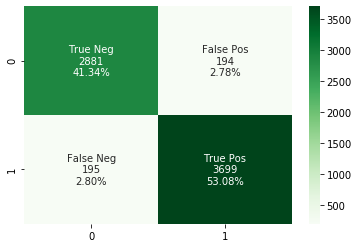

In [39]:
#Training XGB model using tfidf vectorizer
model_tfidf_XGB, transformer_tfidf_XGB, accuracy_tfidf_XGB, _acc_tfidf_XGB, pre_tfidf_XGB, re_tfidf_XGB, f1_tfidf_XGB, scores4=train_xgb(df,
                                                                                                                            'content',
                                                                                                                            'tfidf')
#print("\nAccuracy={}".format(accuracy_tfidf_XGB))
print("Model Scores: \nAccuracy={}, Recall={}, F1={}, Precision={}".format(_acc_tfidf_XGB,
                                                                           pre_tfidf_XGB,
                                                                           re_tfidf_XGB,
                                                                           f1_tfidf_XGB))

2020-05-21 20:37:48,035 : INFO : Initiating...
2020-05-21 20:37:48,035 : INFO : Extracting language features and vectorizing...
2020-05-21 20:39:04,093 : INFO : Fitting XGBClassifier Model...
2020-05-21 20:41:28,032 : INFO : Starting evaluation...


Cross-Validation Accuracy Scores:  [0.94117647 0.94165471 0.93400287 0.93304639 0.93543759 0.92682927
 0.94401914 0.94162679 0.93923445 0.94258373]
Confusion Matrix: 
 [[2891  184]
 [ 207 3687]]


2020-05-21 20:41:31,748 : INFO : Finished training and evaluation.


Model Scores: 
Accuracy=0.9438943894389439, Recall=0.9428248806448241, F1=0.9435019479624689, Precision=0.9431527467987055


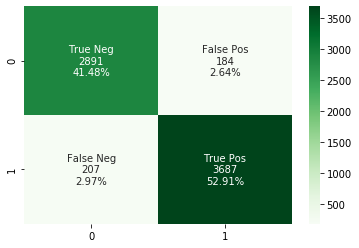

In [40]:
#Training XGB model using counts vectorizer
model_counts_XGB, transformer_counts_XGB, accuracy_counts_XGB, _acc_counts_XGB, re_counts_XGB, f1_counts_XGB, pre_counts_XGB, scores5=train_xgb(df,
                                                                                                                                       'content',
                                                                                                                                       'counts')
#print("\nAccuracy={}".format(accuracy_counts_XGB))
print("Model Scores: \nAccuracy={}, Recall={}, F1={}, Precision={}".format(_acc_counts_XGB,
                                                                           re_counts_XGB,
                                                                           f1_counts_XGB,
                                                                           pre_counts_XGB))

##### Training Random Forest Classifier using TF-IDF and Bag-of-words models

In [41]:
#Training rfc model using tfidf vectorizer
model_tfidf_rfc, transformer_tfidf_rfc, accuracy_tfidf_rfc, _acc_tfidf_rfc, pre_tfidf_rfc, re_tfidf_rfc, f1_tfidf_rfc, scores6=train_rfc(df,
                                                                                                                                'content',
                                                                                                                                'tfidf')
#print("\nAccuracy={}".format(accuracy_tfidf_rfc))
print("Model Scores: \nAccuracy={}, Recall={}, F1={}, Precision={}".format(_acc_tfidf_rfc,
                                                                           pre_tfidf_rfc,
                                                                           re_tfidf_rfc,
                                                                           f1_tfidf_rfc))

2020-05-21 20:41:31,811 : INFO : Initiating...
2020-05-21 20:41:31,811 : INFO : Extracting language features and vectorizing...
2020-05-21 20:42:48,248 : INFO : Fitting Random Forest Model...
2020-05-21 20:52:16,176 : INFO : Starting evaluation...
2020-05-21 20:52:16,300 : INFO : Finished training and evaluation.


Cross-Validation Accuracy Scores:  [0.90435198 0.91009087 0.89335246 0.90483022 0.90817791 0.89670014
 0.90909091 0.91196172 0.90430622 0.9076555 ]
Confusion Matrix: 
 [[2638  437]
 [ 180 3714]]
Model Scores: 
Accuracy=0.9114650595494332, Recall=0.9154245370684618, F1=0.905830608691295, Precision=0.9093029546911637


In [42]:
#Training rfc model using counts vectorizer
model_counts_rfc, transformer_counts_rfc, accuracy_counts_rfc, _acc_counts_rfc, re_counts_rfc, f1_counts_rfc, pre_counts_rfc, scores7=train_rfc(df,'content', 'counts')
print("Model Scores: \nAccuracy={}, Recall={}, F1={}, Precision={}".format(_acc_counts_rfc,
                                                                           re_counts_rfc,
                                                                           f1_counts_rfc,
                                                                           pre_counts_rfc))

2020-05-21 20:52:16,311 : INFO : Initiating...
2020-05-21 20:52:16,312 : INFO : Extracting language features and vectorizing...
2020-05-21 20:53:38,399 : INFO : Fitting Random Forest Model...
2020-05-21 21:02:57,599 : INFO : Starting evaluation...
2020-05-21 21:02:57,728 : INFO : Finished training and evaluation.


Cross-Validation Accuracy Scores:  [0.8962219  0.90626495 0.88617886 0.90722143 0.90961263 0.89478718
 0.90382775 0.9076555  0.90287081 0.90813397]
Confusion Matrix: 
 [[2639  436]
 [ 197 3697]]
Model Scores: 
Accuracy=0.909169177787344, Recall=0.912521793865946, F1=0.9038103649141267, Precision=0.9070263347583231


# Testing on unseen text using the model with highest accuracy.

In [43]:

test_features=transformer_tfidf_XGB.transform([preprocess_text('''Donald Trump said Monday that US officials expect the number of coronavirus cases in the United States to "spike" around Easter Sunday, a reversal from his talk of opening much of the country by 12 April.
A day after Speaker Nancy Pelosi called Mr Trump's early response to warnings the virus was headed to the United States "deadly," the president called the California Democrat a "sick puppy."

"She's got a lot of problems, in my opinion," he said without providing details of those alleged issues. "There's something wrong with the woman."

The president then slammed San Francisco, where Ms Pelosi lives, calling it a "slum" and saying the federal government might take control of the region to address its alleged problems.

Trump calls Pelosi a 'sick puppy' for attacking him
The president appeared in full campaign mode as he cannot hold his signature rallies, contending "Sleepy Joe wouldn't even know what was going on." That was a dig at former Vice President Joe Biden, the presumptive Democratic presidential nominee whom Mr Trump contends is mentally feeble.

The "Fox & Friends" co-hosts were in campaign mode, as well, asking Mr Trump about high approval ratings for New York Governor Andrew Cuomo over his handling of the virus outbreak there. The president responded that Mr Cuomo has only been able to respond to the outbreak in the manner he has because of federal help that he green-lit. He also said he would "love" to run against the New York governor in a presidential general election.

In yet another stunning moment of his term, Mr Trump appeared to claim the United States should have a more confrontational relationship with Germany and a closer one with Russia because the then-Soviet Union lost "50 million people" fighting on the side of the United States – against then-Nazi Germany. "No one talks about that," he said, leaving out the US-Soviet Cold War that followed that world war.

He told the conservative news network's morning show he would be speaking to Russian President Vladimir Putin following the "Fox & Friends" interview. Mr Trump has been criticised for at times appearing to carry out Mr Putin's whims, even though his administration has put sanctions on Russians over its 2016 election meddling.''')])
get_prediction(model_tfidf_XGB,test_features)

[['real']]

In [44]:
test_features=transformer_counts_XGB.transform([preprocess_text('''Writing in the Mail today, he warmed up by blasting Wonder Woman star Gal Gadot for her much-criticised, "tone deaf" version of Imagine that was supposed to lift people's spirits but left many cringing.

But he soon moved on to weightier targets, saying 47-year-old Idris had a place on his "idiot" list despite having contracted coronavirus himself - because he exposed the fact that A-listers were getting tested while NHS staff couldn't.

Piers later attacked High School Musical's Vanessa Hudgens, who called the virus a "bunch of bulls**t", saying she was in "urgent need of shutting the f*** up".

His ire then turned on singer Sam Smith, who earned a place on Piers' list thanks to a series of pictures they shared of a "meltdown" in self-isolation .''')])
get_prediction(model_counts_XGB,test_features)

[['fake']]

In [45]:
import pickle
import gzip
from sklearn.preprocessing import FunctionTransformer
model_path="models\\model_tfidf_xgb.pkl"
transformer_path="models\\transformer_tfidf_xgb.pkl"

# store both the transformer to encode a piece of text and the model itself to make predictions 
pickle.dump(model_tfidf_XGB,gzip.open(model_path, 'wb'),protocol=pickle.HIGHEST_PROTOCOL)
pickle.dump(transformer_tfidf_XGB,gzip.open(transformer_path,'wb'),protocol=pickle.HIGHEST_PROTOCOL)

In [46]:
# test that the model pickled successfully
loaded_model = pickle.load(gzip.open('models\\model_tfidf_xgb.pkl', 'rb'))
loaded_transformer = pickle.load(gzip.open('models\\transformer_tfidf_xgb.pkl', 'rb'))

test_features=loaded_transformer.transform(["iating against career officials."])
get_prediction(loaded_model,test_features)

[['fake']]

In [47]:
print(loaded_model)

XGBClassifier(base_score=0.5, booster=None, colsample=0.9, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.9, tree_method=None,
              validate_parameters=False, verbosity=None)
